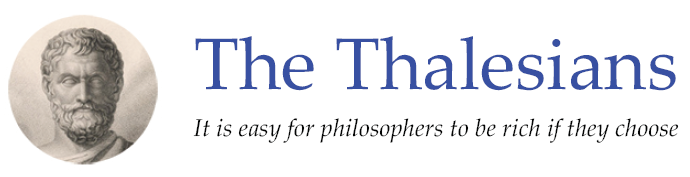

# Lecture 3: Introduciton to `numpy`, `pandas` and `matplotlib`

### Objectives
 - Learn how to use Pandas and Numpy to easily and efficiently manipulate data
 - Review some simple statistical operations
 - Complete the bootcamp exercises

### Background reading

- Python for Data Analysis, Wes McKinney
- Chapter 6, Python for Finance, Yves Hilpisch
- More examples on plotly and its documentation can be found here: https://plot.ly/
- More on visualization in seaborn can be found here: https://seaborn.pydata.org/
- Pandas dataframe docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

## Introduction to Pandas

Pandas is a python library for data analysis. At the core of Pandas, lies the concept of a 'DataFrame' - this can be thought of as powerful type of dictionary designed for data analysis.

The DataFrame is designed to manage indexed and labeled data, not too different from a SQL database table or a worksheet in a spreadsheet application. Consider the following creation of a DataFrame object:

In [1]:
#All libs used in the tutorial
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime 
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
import plotly.offline as py
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


We observe a number of important proporties of the dataframe:
- Data itself can be provided in different shapes and types (list, tuple, ndarray, and dict objects are candidates). 
- Labels: Data is organized in columns, which can have custom names. 
- Index: There is an index that can take on different formats (e.g., numbers, strings, time information). 

The following examples demonstrate several of the most import methods and properties of the Pandas dataframe object.

In [3]:
df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [4]:
df.columns  # the column names

Index(['numbers'], dtype='object')

In [5]:
df.ix['a'] # selection via index

/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



numbers    10
Name: a, dtype: int64

In [6]:
df.ix[['a', 'd']]  # selection of multiple indices

/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,numbers
a,10
d,40


In [7]:
df.ix[-1]  # selection via Index object

/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



numbers    40
Name: d, dtype: int64

In [8]:
df.numbers.std()  # sum per column

12.909944487358056

In [9]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [10]:
df2 = pd.DataFrame(np.arange(1,1000),columns=['integers'])
df2.apply(lambda x: np.sin(x))

,integers
0,0.841471
1,0.909297
2,0.141120
3,-0.756802
4,-0.958924
5,-0.279415
6,0.656987
7,0.989358
8,0.412118
9,-0.544021


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df


,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [14]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,numbers,floats,names
a,10,1.50,Guido
b,20,2.50,Felix
c,30,3.50,Francesc
d,40,4.50,Yves
z,100,5.75,Henry


In [15]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))

,numbers,floats,names,squares
a,10,1.50,Guido,1.0
b,20,2.50,Felix,4.0
c,30,3.50,Francesc,9.0
d,40,4.50,Yves,16.0
z,100,5.75,Henry,NaN


## Statistical operations on dataframes

We shall now turn to collecting and performing basic summary statisical information on some time series data. This is data that is commonly used in finance, more time series data exist everywhere, for example, monthly product sales data or the number of users subscribed to a website on any day. Once we understood how to apply key statistical operations to the dataframe, we shall then briefly review more advanced time series functions.

There are a number of data sources that Pandas can collect historical financial data from. These include:

- Google Finance (google)
- The investor exchange (iex)
- Robinhood (robinhood)
- World Bank (via `pandas.io.wb`) 

We shall see, later in this class, that Quandl is another important source of daily and quarterly historical financial data.

Let's collect historical daily closes for a collection of symbols and populate a dataframe.

In [16]:
import pandas_datareader.data as web
import datetime

prices = pd.DataFrame([])

symbols = ['AAPL', 'GOOG', 'MSFT','ZNGA', 'VIXY']
cols = ['r','b','g','y', 'c']

start = datetime.datetime(2015, 5, 4)
end = datetime.datetime(2018, 8, 25)
for symbol in symbols:
  prices[symbol] = web.DataReader(symbol,'iex',start,end)['close']

prices.tail(10)

,AAPL,GOOG,MSFT,ZNGA,VIXY
date,,,,,
2018-08-13,208.87,1235.01,107.7951,3.81,26.160
2018-08-14,209.75,1242.10,109.1399,3.76,24.810
2018-08-15,210.24,1214.38,107.6600,3.70,26.370
2018-08-16,213.32,1206.49,107.6400,3.70,24.950
2018-08-17,217.58,1200.96,107.5800,3.72,24.300
2018-08-20,215.46,1207.77,106.8700,3.74,23.830
2018-08-21,215.04,1201.62,105.9800,3.74,24.335
2018-08-22,215.05,1207.33,107.0600,4.03,24.040
2018-08-23,215.49,1205.38,107.5600,3.93,23.860


The info() member function of the dataframe provides the meta-data. 

In [17]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 2015-05-04 to 2018-08-24
Data columns (total 5 columns):
AAPL    836 non-null float64
GOOG    836 non-null float64
MSFT    836 non-null float64
ZNGA    836 non-null float64
VIXY    836 non-null float64
dtypes: float64(5)
memory usage: 39.2+ KB


The describe() member function of the dataframe summarizes the statistical properities of the data.

In [18]:
prices.describe()

,AAPL,GOOG,MSFT,ZNGA,VIXY
count,836.000000,836.000000,836.000000,836.000000,836.000000
mean,133.077182,848.481866,65.018719,3.088469,129.370604
std,32.495967,181.455594,19.039252,0.621732,107.296845
min,86.980500,516.830000,37.782100,1.810000,21.430000
25%,105.978775,720.030000,49.701175,2.580000,36.177500
50%,120.896750,796.880000,60.465250,2.850000,80.680000
75%,159.269250,992.337500,77.441775,3.680000,231.200000
max,217.580000,1268.330000,110.405100,4.470000,408.600000


## Plotting DataFrames
In the following example, we shall demonstrate how to plot the columns of the dataframe against the time index using the matplotlib module. 

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Close Prices')

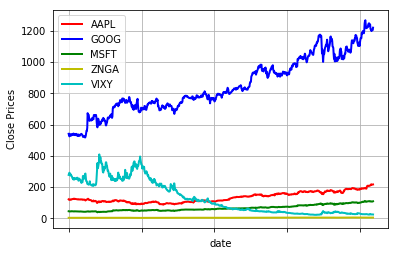

In [19]:
%matplotlib inline  
%pylab inline
import matplotlib.pyplot as plt
prices.plot(style=cols, lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('Close Prices')

We observe that the different instruments, i.e. the columns, are scaled differently. It is therefore convenient to normalize the data by calculating the returns. We shall first perform a quick visual check that the normalized data looks 'reasonable'. We use the tail() member function of the dataframe to view the 5 most recent observations of the data. 

In [20]:
rets = pd.DataFrame([])

for symbol in symbols:
  rets[symbol] = np.log(prices[symbol] / prices[symbol].shift(1))

rets.tail()

,AAPL,GOOG,MSFT,ZNGA,VIXY
date,,,,,
2018-08-20,-0.009791,0.005654,-0.006622,0.005362,-0.019531
2018-08-21,-0.001951,-0.005105,-0.008363,0.000000,0.020970
2018-08-22,0.000047,0.004741,0.010139,0.074681,-0.012197
2018-08-23,0.002044,-0.001616,0.004659,-0.025127,-0.007516
2018-08-24,0.003104,0.012589,0.007779,0.002541,-0.005042


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'daily returns')

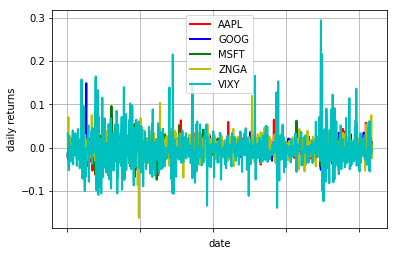

In [21]:
%matplotlib inline  
%pylab inline
rets.plot(style=cols, lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('daily returns')

In [22]:
rets.describe()

,AAPL,GOOG,MSFT,ZNGA,VIXY
count,835.000000,835.000000,835.000000,835.000000,835.000000
mean,0.000696,0.000975,0.001068,0.000550,-0.002943
std,0.014351,0.014426,0.013705,0.020802,0.042231
min,-0.067965,-0.054645,-0.074411,-0.162795,-0.139641
25%,-0.005580,-0.004869,-0.005074,-0.011391,-0.024253
50%,0.000431,0.000866,0.000832,0.000000,-0.006042
75%,0.007806,0.007978,0.007535,0.012553,0.012939
max,0.064189,0.148872,0.096011,0.119347,0.294433


We measure the correlation between time series. Here we shall explore VIX returns and its relation to single named equity returns in order to observe the "leverage effect". We shall print the pair-wise correlations in addition to producing scatter plots of the equity returns against the VIX returns.

In [23]:
rets[['AAPL','VIXY']].corr()

,AAPL,VIXY
AAPL,1.000000,-0.525546
VIXY,-0.525546,1.000000


Returns scatterplots for AAPL
Returns scatterplots for GOOG
Returns scatterplots for MSFT
Returns scatterplots for ZNGA
Returns scatterplots for VIXY


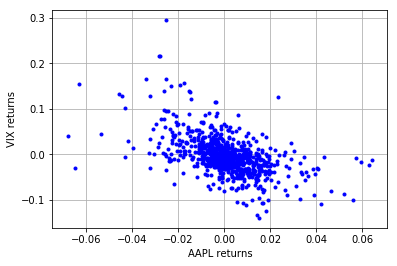

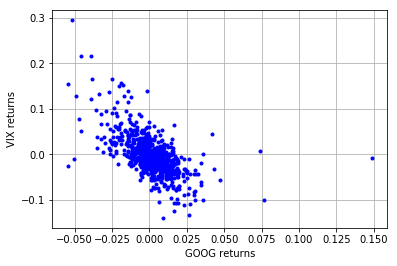

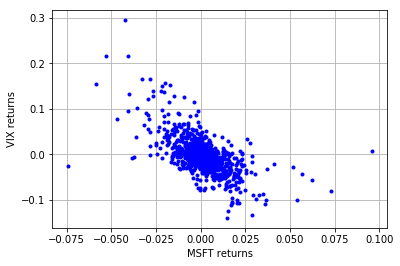

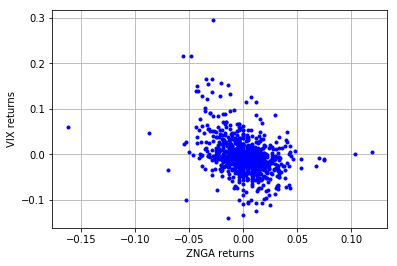

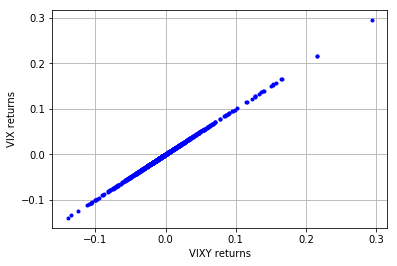

In [26]:
for s in symbols : print('Returns scatterplots for {}'.format(s))
for symbol in symbols:
  xdat = rets[symbol]
  ydat = rets['VIXY']
  plt.plot(xdat, ydat, 'b.')
  ax = plt.axis()  # grab axis values
  plt.grid(True)
  plt.xlabel(symbol + ' returns')
  plt.ylabel('VIX returns')
  plt.show()

Pandas provides a number of useful time series filters such as moving averages and moving standard deviations. We plot here, the 30-day moving average for APPL price. 


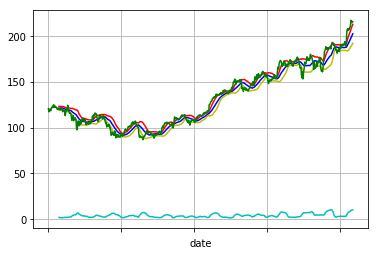

In [18]:
prices['AAPL'].rolling(window=30).mean().plot(grid=True, style=cols[1])
prices['AAPL'].rolling(window=30).std().plot(grid=True, style=cols[4])
(prices['AAPL'].rolling(window=30).mean()+prices['AAPL'].rolling(window=30).std()).plot(grid=True, style=cols[0])
(prices['AAPL'].rolling(window=30).mean()-prices['AAPL'].rolling(window=30).std()).plot(grid=True, style=cols[3])
prices['AAPL'].plot(grid=True, style=cols[2])

In [ ]:
rets['index_stock'] = (rets['AAPL'] + rets['GOOG']) / 2 #linear operation with two timeseries
rets['index_stock'].plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('daily returns index')

In [ ]:
prices['AAPL_diff'] = prices['AAPL'].diff() #calculate difference with previous elements
prices['AAPL_diff_2'] = prices['AAPL'].diff(2) # calculate difference with previous second elements
prices.head(10)

In [ ]:
prices['AAPL'].apply(np.log).diff() # easy way to calculate log differences

In [ ]:
prices['AAPL'].apply(np.log).diff().dropna() # can also drop NaN values

In [ ]:
#We can create bolean vectors 
rets['index_stock'].head(10) > 0

In [ ]:
#and we can use the vectors to chose the elements in the dataframe
rets[rets['index_stock'] > 0].head()

In [ ]:
#we can also work in a similar manner with a specific column of the dataframe
rets['GOOG'][rets['index_stock'] > 0].head()

In [ ]:
#Suppose we want to use a very specific location in a dataframe
t = [3,4]
#we can easily do that with the locator
rets.iloc[t]

In [ ]:
#Plotting histogram
num_bins = 10
plt.hist(rets['VIXY'].dropna(), num_bins, facecolor = 'red')
plt.title("Histogram of VIX returns ")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [ ]:
#Plotting histogram
num_bins = 100
plt.hist(rets['AAPL'].dropna(), num_bins, facecolor = 'blue')
plt.title("Histogram of AAPL stock returns ")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [ ]:
#Using visualization library seaborn
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
corr = rets.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
sns.jointplot(x="VIXY", y="AAPL", data=rets, kind="kde")

In [ ]:
#We can also plot different plots on one figure
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
plt.figure(1)
plt.subplot(311)

plt.title('Google',fontsize=20)
plt.plot(range(len(prices.index)),prices["GOOG"], linestyle = '-', color='green', lw='1')
plt.legend(loc = 'lower right', frameon = True)
plt.grid()
plt.ylabel('Price')

plt.subplot(312)

plt.title('Apple',fontsize=20)
plt.plot(range(len(prices.index)),prices.AAPL, linestyle = '-', color='blue', lw='1')
plt.legend(loc = 'lower right', frameon = True)
plt.grid()
plt.ylabel('Price')

plt.subplot(313)

plt.title('VIX',fontsize=20)
plt.plot(range(len(prices.index)),prices.VIXY, linestyle = '-', color='red', lw='1')
plt.legend(loc = 'lower right', frameon = True)
plt.grid()
plt.xlabel('Date');plt.ylabel('Price')

## Questions/Exercises

### 1) Can you plot 60, 90 days moving averages for Google stock on same graph?
### 2) Can you calculate historical volatility of the Google, Apple stock and compare its with VIX by computing correlation and plotting timeseries of both?
### 3) Construct the index of the stocks with equal weights? Where the "the leverage effect" is more significant: individual stocks or index?